In [12]:
import all_analytic_modules

Приветствую! Это моё первое исследование

Чтобы его провести, я буду использовать функционал Питона и его библиотек - Matplotlib, pandas, numpy,scipy,seaborn.
Импортируем файл All_analytic_modules с библиотеками и методами статистики (дисперсии, T-тесты, визуализация и тд)

Ниже ее код, для наглядности работы:

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns


def mediana(sample):
    return sample.median()


def moda(sample):
    return sample.mode()


def avarage(sample):
    """
    Mean of Data
    """
    return sample.mean()


def razmah(sample):
    return max(sample) - min(sample)


def D(sample):
    """
    dispersion
    """
    xsr = avarage(sample)
    cnt = 0
    for i in range(len(sample)):
        cnt += (xsr - sample[i]) ** 2
    return cnt / len(sample)


def sigma(sample):
    """
    standart deviation in general data
    """
    return D(sample) ** 0.5


def sd(sample):
    """
    standart deviation in nongeneral data
    """
    xsr = avarage(sample)
    cnt = 0
    for i in range(len(sample)):
        cnt += (xsr - sample[i]) ** 2
    d = cnt / (len(sample) - 1)
    return d ** 0.5


def se(sample):
    """
    standart deviation. We change of sd and sigma
    """
    if len(sample) > 30:
        return sd(sample) / len(sample) ** 0.5
    else:
        return sigma(sample) / len(sample) ** 0.5


def truerange():
    """
    confidence interval
    """
    print ('Введите стандартную ошибку (se):')
    srednee = float(input())
    print ('Введите вашe число:')
    x = float(input())
    print('Введите вашу последовательность в строку через пробел:')
    data = np.array(list(map(int, input().split())))
    xsr = sum(data) / len(data)
    print (('Доверительный интервал = [' , round(xsr - 1.96 * srednee, 4), ' ', round(xsr + 1.96 * srednee, 4), ']'))
    return (xsr - 1.96 * srednee, xsr + 1.96 * srednee)


def veroyatnost_of_one_value_general(sample):
    """
    probability of case in general data
    """
    print ('Покажет, какой процент людей обладает нужным параметром')
    mean = avarage(sample)
    std = se(sample)
    x = int(input( 'Введите значение' ))
    # sf - Survival function = (1 - cdf) - Cumulative distribution function
    return stats.norm(mean, std).sf(x) * 100


def t_veroyatnost_of_one_value():
    """
    probability of case in nongeneral data, len(data)<30
    """
    print ('Введите вашу последовательность в строку через пробел:')
    data = np.array(list(map(int, input().split())))
    print('Введите предполагаемое среднее значение генеральной совокупности:')
    u = float(input())
    xsr = sum(data) / len(data)
    df = len(data) - 1
    t = (xsr - u) / se(data)
    p = 2 * stats.t.sf(abs(t), df)
    return p


def t_test(sample1, sample2):
    """
    checking the equality of the means in two samples
    """
    sd1 = sd(sample1)
    sd2 = sd(sample2)
    SE = (sd1 ** 2 / len(sample1) + sd2 ** 2 / len(sample2)) ** 0.5
    xsr1 = avarage(sample1)
    xsr2 = avarage(sample2)
    T = (xsr1 - xsr2) / SE
    df = len(sample1) + len(sample2) - 2
    DF = \
        pd.DataFrame({'Выборка1': sample1,
                     'Выборка2': sample2}).agg(['mean'
            , 'std', 'count', 'sem']).transpose()
    DF.columns = ['Mx', 'SD', 'N', 'SE']
    K = stats.t.ppf(0.975, DF['Mx'] - 1)
    print (DF)
    p = stats.t.sf(T, df)
    print ('P-уровень значимости =',p)
    if p >= 0.05:
        print ('Мы не можем отклонить нулевую гипотезу')
    else:
        print ('Можем отклонить нулевую гипотезу')
    DF['interval'] = K * DF['SE']
    a = plt.boxplot([sample1, sample2], vert=True, patch_artist=True,
                    labels=['Выборка 1'
                    ,
                    'Выборка 2'
                    ])
    plt.show()
    b = plt.errorbar(
        x=['Выборка 1'
           ,
           'Выборка 2'
           ],
        y=DF['Mx'],
        yerr=DF['interval'],
        capsize=3,
        mfc='red',
        mec='black',
        fmt='o',
        )
    plt.show()
    return p


def histogramma(sample):
    plt.hist(sample, bins=np.arange(min(sample), max(sample) + 1, 1))
    plt.show()
    plt.hist(sample, bins=np.arange(min(sample), max(sample) + 1, 1),
             density=True)
    plt.show()


def Z_graph(sample):
    """
    Z-change of general data graphic
    """
    xsr = avarage(sample)
    zmassive = []
    for i in range(len(sample)):
        z_value_i = (sample[i] - xsr) / sd(sample)
        zmassive.append(z_value_i)
    sns.histplot(data=sample, kde=True)
    plt.show()
    return zmassive


def diagramma_boxplot(sample):
    plt.boxplot(sample, showfliers=1)
    plt.show()

def allavarage(sample):
    """
    one-way analysis of variance method to see mean of ALL data
    """
    n=sample.size
    cnt=0
    a=sample.sum()
    for i in a:
        cnt+=i
    return cnt/n

def SST(sample):
    """
    Sum of Squares Total
    """
    cnt=0
    xsr=allavarage(sample)
    a=sample.to_numpy()
    for i in range(len(a)):
        for j in range(len(a[i])):
            cnt+=((a[i][j]-xsr)**2)
    DF=sample.size-1
    return cnt

def SSW(sample):
    """
    Sum of Squares Within groups. Return SS, Degree of Freedom
    """
    a=sample.to_numpy()
    a=a.T
    cnt=0
    for i in range(len(a)):
        xsr=sum(a[i])/len(a[i])
        for j in range(len(a[i])):
            cnt+=((a[i][j]-xsr)**2)
    a=a.T
    DF=sample.size-i-1
    return cnt,DF

def SSB(sample):
    """
    Sum of Squares Between groups. Return SS, Degree of Freedom
    """
    a=sample.to_numpy()
    cnt=0
    srednee=allavarage(sample)
    a=a.T
    for i in range(len(a)):
        xsr=sum(a[i])/len(a[i])
        cnt+=(len(a[i])*((xsr-srednee)**2))
    a=a.T
    DF=i
    return cnt,DF

def f_val(sample):
    """
    Returns Value of F, Degree of Freedom Between, Degree of Freedom Within group
    """
    q,w=SSB(sample)
    o,i=SSW(sample)
    f_v= (q/w)/(o/i)
    return f_v, w,i

def factor_dispersion_analys(sample):
    """
    Returns P-value of F-test
    """
    f_value,dfb,dfw= f_val(sample)
    p=stats.f.sf(f_value,dfb,dfw)
    return p

Итак, начнем!

Первым делом мы <b>найдем наши цели</b>! Допустим, мы хотим понять, есть ли различия в успешности сдачи экзаменов между Мужчинами и Женщинами. Я взял этот тест для начала, так как в нем всего лишь 2 группы

Для этого, придется собрать информацию о студентах. Но что конкретно собирать? Тут все просто - нам нужен пол, сумма баллов за экзамены.
Этот этап должен занимать продолжительное время, но мы воспользуемся готовым датасетом на сайте kaggle: 'Student Perfomans in Exams' https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

71 килобайт данных - огромное количество непустых записей, гарантирует нам Нормальное распределение данных, поэтому A/A тест проводить не нужно (еще и потому что группа студентов одна и та же - студенты)

Итак, для начала, нужно <b>преобразовать данные в тот формат, который будет удобен нам</b>. Из таблицы с большим количеством информации выберем всего пару рядов - пол и сумму баллов за 3 экзамена (получим путем сложения трем экзаменов):

In [252]:
data = pd.read_csv('exams.csv')
print(data)
print()

     gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67         

А теперь преобразуем данные так, как нам нужно, убрав лишние столбцы

In [119]:
data=data[['gender','math score','reading score','writing score']]
data

,gender,math score,reading score,writing score
0,male,67,67,63
1,female,40,59,55
2,male,59,60,50
3,male,77,78,68
4,male,78,73,68
...,...,...,...,...
995,male,73,70,65
996,male,85,91,92
997,female,32,35,41
998,female,73,74,82


Осталось объединить 3 ряда последних ряда в одну сумму , и все готово!

In [140]:
data = pd.read_csv('exams.csv')
data=data[['gender','math score','reading score','writing score']]
data['summa']=data['math score'] + data['reading score']+ data['writing score']
data=data.drop(['math score','reading score','writing score'],axis='columns')
data

,gender,summa
0,male,197
1,female,154
2,male,169
3,male,223
4,male,219
...,...,...
995,male,208
996,male,268
997,female,108
998,female,229


Отлично - у нас есть все данные. Самое время <b>сформулировать гипотезы</b>:

<b>H0 - нулевая гипотеза</b> - Различий между группами нет

<b>H1- ненулевая гипотеза</b> - Существуют статистически важные различия между группами

<p>Для того, чтобы выбрать правильную гипотезу, мы можем пойти двумя различными путями:<br>
-Использовать тест <b>"T-критерий Стьюдента"</b><br>
    -Использовать <b>Однофакторный Дисперсионный анализ, или по-другому - F- test (Критерий Фишера)</b><br>
    Мы возьмем <b>второй вариант</b></p>

В основе идеи Теста фишера лежит то, что Чем больше различие между группами тем больше шанс получить ненулевую гипотезу гипотезу, то есть результат, что группы различны!<p>
    Подготовим данные для данного теста. Разделим данные на группу мужчин и группу женщин, запишем их баллы в строки:

In [176]:
data = pd.read_csv('exams.csv')
data=data[['gender','math score','reading score','writing score']]
data['summa']=data['math score'] + data['reading score']+ data['writing score']
data=data.drop(['math score','reading score','writing score'],axis='columns')

men=data[data.gender =="male"]["summa"]
women=data[data.gender =="female"]["summa"]
data= pd.DataFrame([men,women],index=['male','female'])
data

,0,2,3,4,7,8,9,10,12,13,...,976,977,979,980,984,988,991,993,997,998
male,197.0,169.0,223.0,219.0,265.0,184.0,134.0,267.0,249.0,221.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,174.0,190.0,138.0,209.0,232.0,268.0,170.0,108.0,229.0


1) Найдем <b>X среднее</b>, то есть среднее всех записей. Оно равно:

In [189]:
srednee=(103255 +99881)/1000 
srednee

203.136

<b>x mean =203.136 балла</b>

2) Найдем <b>Sum of Square Between group:</b>

In [217]:
def SSB(sample: list) -> list:
    """
    Sum of Squares Within groups. Return SS, Degree of Freedom
    """
    a=sample.to_numpy()
    cnt=0
    srednee=203.136 #Укажем значение среднего
    for i in range(len(a)):
        mass=a[i]
        mass = mass[~np.isnan(mass)]
        xsr=sum(mass)/len(mass)
        cnt+=(len(mass)*((xsr-srednee)**2))
    DF=i
    return cnt,DF

ssb,dfb = SSB(data)
ssb

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


12493.87524515942

<b>SSb и DFb = </b> 12493.87524515942 и 1 соответственно 

3) Найдем <b>Sum of Square Within group:</b>

In [223]:
def SSW(sample: list) -> list:
    """
    Sum of Squares Within groups. Return SS, Degree of Freedom
    """
    a=sample.to_numpy()
    cnt=0
    DF=0
    for i in range(len(a)):
        mass=a[i]
        mass = mass[~np.isnan(mass)]
        xsr=sum(mass)/len(mass)
        for j in range(len(mass)):
            cnt+=((mass[j]-xsr)**2)
        DF+=len(mass)
    return cnt,DF-i-1
ssw,dfw= SSW(data)
ssw

1881579.628754838

<b>SSw и DFw = </b> 1881579.628754838 и 998 соответственно 

4) <b>На данный момент мы имеем все, чтобы рассчитать F-Value:</b>. Сделаем же это:

In [226]:
f_value= (ssb/dfb)/(ssw/dfw)
f_value

6.626818926032147

<b> F-VALUE = 6.626818926032147 , DFb=1, DFw=998</b>

5) Рассчитаем <b>P-VALUE</b>:

In [228]:
p=stats.f.sf(f_value,dfb,dfw)
p

0.010188670909791553

<b> P-VALUE ПРИБЛИЗИТЕЛЬНО  РАВНО 0.0102<p> И именно это позволяет нам с уверенностью отклонить нулевую гипотезу</b>

6) Значит, <b>существует статистически значимое различие</b> в сдаче экзаменов между Мужчинами и женщинами, давайте взглянем на несколько графиков:

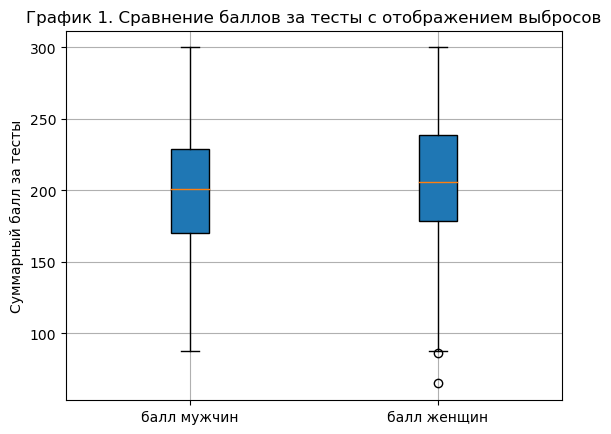

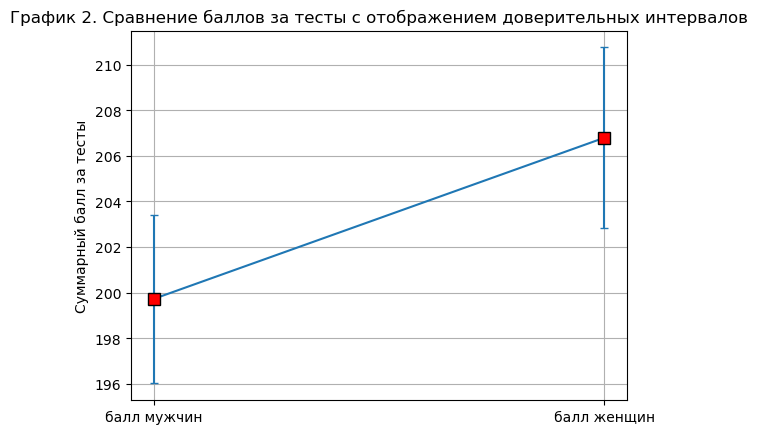

In [248]:
def visual(sample1, sample2):
    """
    checking the equality of the means in two samples
    """

    DF = \
        pd.DataFrame({'Выборка1': sample1,
                     'Выборка2': sample2}).agg(['mean'
            , 'std', 'count', 'sem']).transpose()
    DF.columns = ['Mx', 'SD', 'N', 'SE']
    K = stats.t.ppf(0.975, DF['Mx'] - 1)
    DF['interval'] = K * DF['SE']
    DF
    a = plt.boxplot([sample1, sample2], vert=True, patch_artist=True,
                    labels=['балл мужчин'
                    ,
                    'балл женщин'
                    ])
    plt.title("График 1. Сравнение баллов за тесты с отображением выбросов")
    plt.ylabel("Суммарный балл за тесты")
    plt.grid()
    plt.show()
    b = plt.errorbar(
        x=['балл мужчин'
           ,
           'балл женщин'
           ],
        y=DF['Mx'],
        yerr=DF['interval'],
        capsize=3,
        mfc='red',
        mec='black',
        #fmt='o',
        label='График',
        marker="s",
        markersize=8
        )
    plt.title("График 2. Сравнение баллов за тесты с отображением доверительных интервалов")
    plt.ylabel("Суммарный балл за тесты")
    plt.grid()
    plt.show()
    

visual(men,women)

Если обратить внимание на график 2, то можно отчетливо заметить разницу в баллах. <b>Женщины, в среднем, пишут экзамен лучше на почти 8 баллов, чем мужчины</b> (199 и 207 баллов соответственно).<p> <b>Это подтверждает теорию о том, что 2 наши группы различны, соответственно полученная нами теория H1, наиболее вероятно, является верной.</b> И это даже с учетому у женщин двух выбросов (см. График 1), которые могли бы испортить данные. Но у нас много записей, поэтому они сильно не влияют

7) <b>Вывод :</b>

В результате проделанной работы <b>мы получили статистически значимые различия между успехом сдачей экзаменов мужчинами и женщинами.</b><p> Женщины, в среднем, пишут экзамены лучше чем мужчины (примерно на 8 баллов).<p> Средний тестовый балл приблизительно равен 203 балла <p> А 50% сдающих экзамен укладываются в диапазон ~175-237 баллов

8)<b>А где это вообще можно применить? Зачем была эта работа?</b>

Хоть работа и учебная и всего лишь первая на моем счету, но по ней все равно можно сделать выводы.<p> Допустим исследование бы проводилось не в иностранном гос-ве, а в России, и полученные результаты мы отразим на ЕГЭ.<p>
    Даже в таком случае, полученным данным найдется применение. Например, яндекс запускал программу поддержки студентов, сдавших егэ на 270+ баллов. Если бы мы взяли за основу не 270, а 200 баллов, то:<p> Нам бы следовало выбирать условия акции, которые смогут больше заинтересовать женский пол. Так бы мы привлекли больше потенциальных клиентов. Если ввести много условностей, конечно (например, одинаковое кол-во сдающих экзамены и тд)

<b>Спасибо за внимание!</b>